In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Exploratory Data Analysis

In [2]:
train = pd.read_csv(r"C:\Users\VIPIN\Downloads\train_.csv")

In [3]:
test = pd.read_csv(r"C:\Users\VIPIN\Downloads\test.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


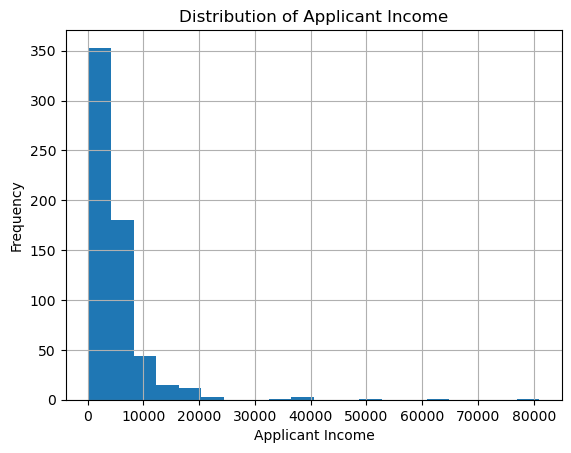

In [14]:
# Histogram of numerical features
train['ApplicantIncome'].hist(bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()

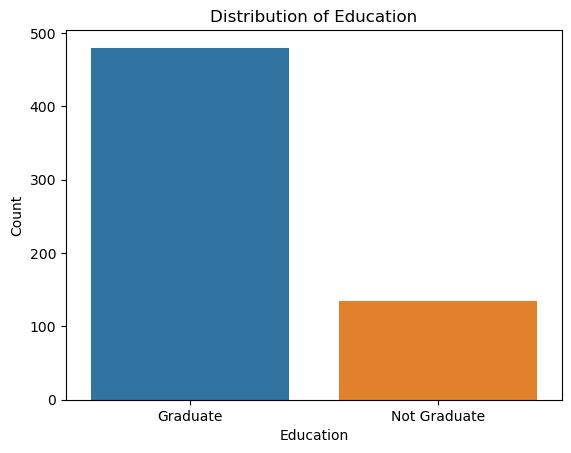

In [15]:
# Bar plot of categorical features
sns.countplot(x='Education', data=train)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

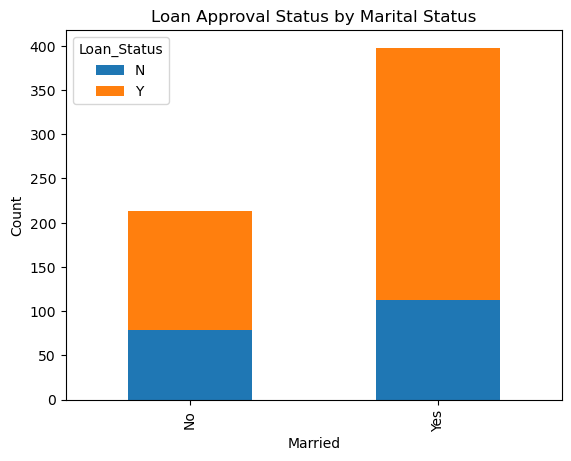

In [16]:
# Cross-tabulation between categorical and target variable
pd.crosstab(train['Married'], train['Loan_Status']).plot(kind='bar', stacked=True)
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Loan Approval Status by Marital Status')
plt.show()

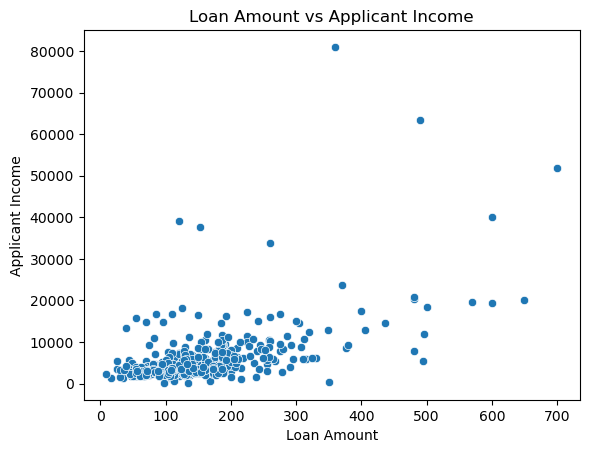

In [17]:
# Scatter plot between numerical features
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=train)
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.title('Loan Amount vs Applicant Income')
plt.show()

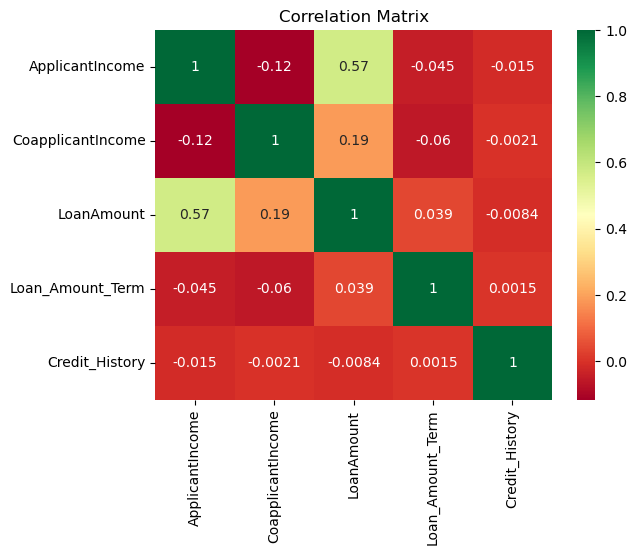

In [18]:
# Heatmap of correlation matrix
correlation_matrix = train.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

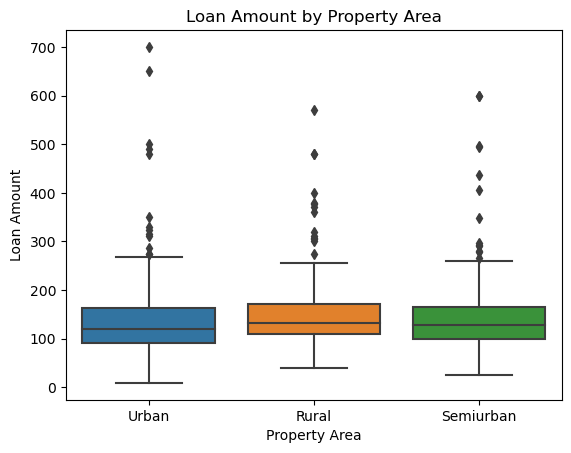

In [19]:
# Box plot of LoanAmount by Property_Area
sns.boxplot(x='Property_Area', y='LoanAmount', data=train)
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Property Area')
plt.show()

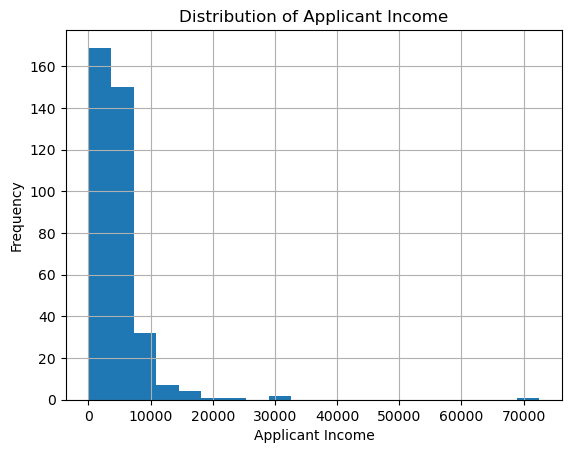

In [20]:
# Histogram of numerical features
test['ApplicantIncome'].hist(bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()


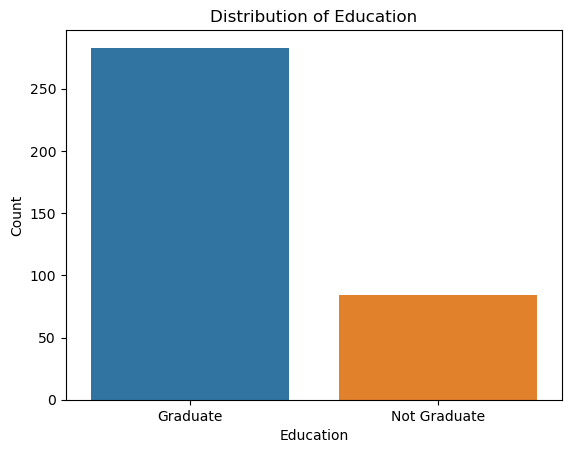

In [21]:
# Bar plot of categorical features
sns.countplot(x='Education', data=test)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

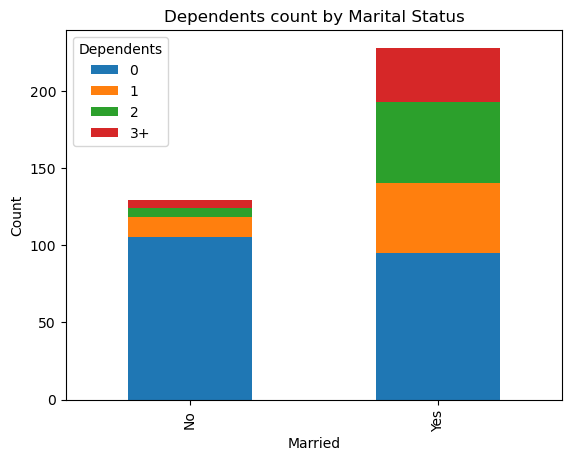

In [22]:
# Example: Cross-tabulation between categorical features
pd.crosstab(test['Married'], test['Dependents']).plot(kind='bar', stacked=True)
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Dependents count by Marital Status')
plt.show()

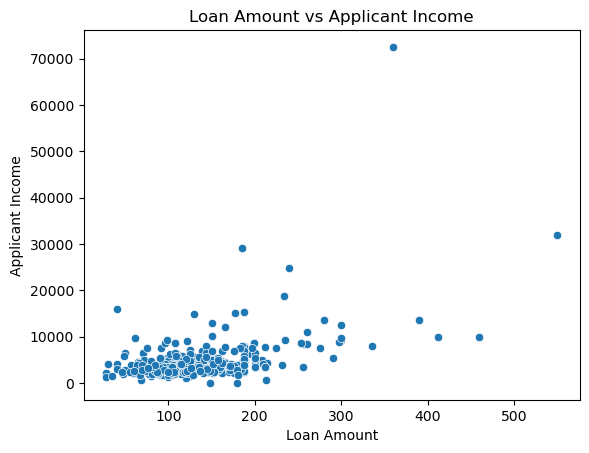

In [23]:
# Example: Scatter plot between numerical features
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=test)
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.title('Loan Amount vs Applicant Income')
plt.show()

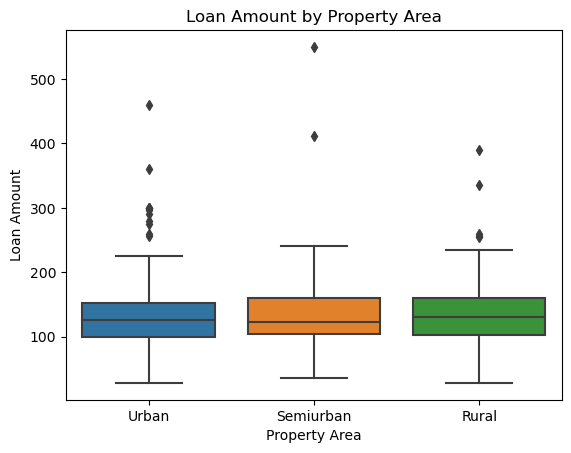

In [24]:
# Box plot of LoanAmount by Property_Area
sns.boxplot(x='Property_Area', y='LoanAmount', data=test)
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Property Area')
plt.show()

# Pre-processing

In [25]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
# Train dataset
# Handling missing values
# Fill missing values in numerical columns with the mean
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer = SimpleImputer(strategy='mean')
train[numerical_cols] = imputer.fit_transform(train[numerical_cols])

# Fill missing values in categorical columns with the mode
categorical_cols = ['Gender', 'Married','Dependents', 'Self_Employed']
imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = imputer.fit_transform(train[categorical_cols])

In [28]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
# Encoding categorical variables
label_encoder = LabelEncoder()
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Married'] = label_encoder.fit_transform(train['Married'])
train['Dependents'] = label_encoder.fit_transform(train['Dependents'])
train['Education'] = label_encoder.fit_transform(train['Education'])
train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])
train['Property_Area'] = label_encoder.fit_transform(train['Property_Area'])
train['Loan_Status'] = label_encoder.fit_transform(train['Loan_Status'])

In [30]:
# Scaling numerical variables
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [31]:
# Drop unnecessary columns
train.drop(['Loan_ID'], axis=1, inplace=True)

In [32]:
# Check the updated 'train' dataset
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,0.45164,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,0.45164,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,0.45164,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,0.45164,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,0.45164,2,1


In [33]:
train.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [34]:
# Test dataset

In [35]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [36]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [37]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
# Handle missing values

# Fill missing values in numerical columns with the mean
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer = SimpleImputer(strategy='mean')
test[numerical_cols] = imputer.fit_transform(test[numerical_cols])

# Fill missing values in categorical columns with the mode
categorical_cols = ['Gender', 'Dependents', 'Self_Employed']
imputer = SimpleImputer(strategy='most_frequent')
test[categorical_cols] = imputer.fit_transform(test[categorical_cols])

In [39]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [40]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for column in categorical_columns:
    test[column] = label_encoder.fit_transform(test[column])
    

In [41]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [42]:
# Scale numerical variables
scaler = StandardScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
test[numerical_columns] = scaler.fit_transform(test[numerical_columns])

In [43]:
# Drop unnecessary columns
test.drop(['Loan_ID'], axis=1, inplace=True)

In [44]:
# Print the preprocessed test dataset
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0.186461,-0.673335,-0.429368,0.270603,0.47918,2
1,1,1,1,0,0,-0.352692,-0.029848,-0.166482,0.270603,0.47918,2
2,1,1,2,0,0,0.039641,0.098849,1.180807,0.270603,0.47918,2
3,1,1,2,0,0,-0.502774,0.418877,-0.593671,0.270603,0.00000,2
4,1,0,0,1,0,-0.311909,-0.673335,-0.955139,0.270603,0.47918,2


# logistic Regression

In [45]:
# Prepare the data
X = train.drop(['Loan_Status'], axis=1)
y = train['Loan_Status']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [47]:
# Choose a model
model = LogisticRegression()

In [48]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Predict on the test data
pred = model.predict(X_test)

In [50]:
print('accuracy = ', accuracy_score(y_test, pred))
print('precision = ', precision_score(y_test, pred, average='macro'))
print('recall = ', recall_score(y_test, pred, average='macro'))
print('f1 score = ', f1_score(y_test, pred, average='macro'))

confusion_matrix(y_test,pred)

accuracy =  0.7886178861788617
precision =  0.853491902834008
recall =  0.7030523255813954
f1 score =  0.7196704067321178


array([[18, 25],
       [ 1, 79]], dtype=int64)

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(8,25)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=2)
    classifier.fit(X_train, y_train)
    pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test, pred_knn)
    metric.append(acc)

# K value vs Accuracy

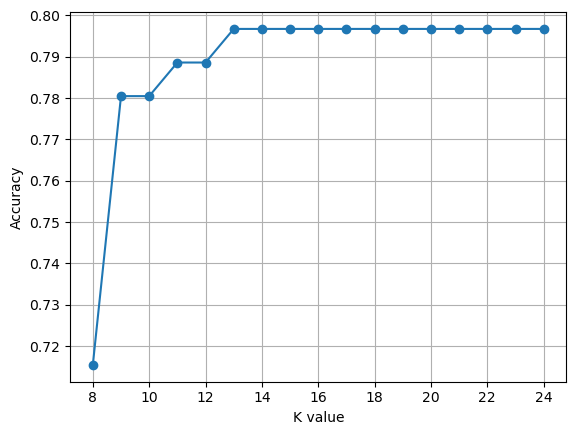

In [52]:
plt.plot(neighbors, metric, 'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [53]:
# Make predictions

classifier = KNeighborsClassifier(n_neighbors=15, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)
pred_knn = classifier.predict(X_test)

In [54]:
print('accuracy = ',accuracy_score(y_test, pred_knn))
print('precision = ', precision_score(y_test, pred_knn, average='macro'))
print('recall = ', recall_score(y_test, pred_knn, average='macro'))
print('f1 score = ', f1_score(y_test, pred_knn, average='macro'))
confusion_matrix(y_test, pred_knn)

accuracy =  0.7967479674796748
precision =  0.8809523809523809
recall =  0.7093023255813954
f1 score =  0.7275143996455471


array([[18, 25],
       [ 0, 80]], dtype=int64)

# DECISION TREES

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [56]:
print('accuracy = ',accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred, average='macro'))
print('recall = ', recall_score(y_test, y_pred, average='macro'))
print('f1 score = ', f1_score(y_test, y_pred, average='macro'))
confusion_matrix(y_test, y_pred)

accuracy =  0.7154471544715447
precision =  0.6848659003831418
recall =  0.6683139534883721
f1 score =  0.6736905934965511


array([[22, 21],
       [14, 66]], dtype=int64)

# Random Forest

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred_rf = rf.predict(X_test)

In [59]:
print('accuracy = ',accuracy_score(y_test, y_pred_rf))
print('precision = ', precision_score(y_test, y_pred_rf, average='macro'))
print('recall = ', recall_score(y_test, y_pred_rf, average='macro'))
print('f1 score = ', f1_score(y_test, y_pred_rf, average='macro'))
confusion_matrix(y_test, y_pred_rf)

accuracy =  0.7642276422764228
precision =  0.7853285328532853
recall =  0.6843023255813954
f1 score =  0.6968125796855078


array([[18, 25],
       [ 4, 76]], dtype=int64)

In [60]:
rf1 = RandomForestClassifier(n_estimators=10, max_depth=20, criterion='entropy',min_samples_split=3)

In [61]:
rf1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=10)

In [62]:
y_pred = rf1.predict(X_test)

In [63]:
print('accuracy = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))

accuracy =  0.7642276422764228
precision =  0.7575757575757576
recall =  0.9375
f1 score =  0.8379888268156425


# SVM

In [64]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
y_pred = svm.predict(X_test)

In [66]:
print('accuracy = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))

confusion_matrix(y_test,y_pred)

accuracy =  0.7886178861788617
precision =  0.7596153846153846
recall =  0.9875
f1 score =  0.8586956521739131


array([[18, 25],
       [ 1, 79]], dtype=int64)

In [67]:
pred_knn = classifier.predict(test)

In [68]:
pred_knn

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [69]:
pred_knn = pd.DataFrame(pred_knn)

In [70]:
type(pred_knn)

pandas.core.frame.DataFrame

In [71]:
pred_knn

,0
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [77]:
data1 = pd.read_csv(r"C:\Users\VIPIN\Downloads\sample_submission_.csv")

In [78]:
data1.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [79]:
data1['Loan_Status'] = pred_knn

In [80]:
data1.head(30)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [82]:
data1.to_csv(r"C:\Users\VIPIN\Downloads\sample_submission_.csv", index=False)